In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [0]:
df=pd.read_csv('cleaningtrainingdata.csv')

#Training a Linear Regression Model เลือกfeature

In [0]:
X=df[['PrevAVGCost','PrevAssignedCost','AVGCost','LatestDateCost','A','B','C','D','E','F','G']]
y=df['GenPrice']

#Train test split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=888)

In [37]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(19700, 11) (19700,)
(4926, 11) (4926,)


#Creating and Traing the model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm=LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.intercept_ 

7.558824448884792

In [42]:
lm.coef_

array([-0.20197369,  1.27350373,  0.15684448,  0.0239253 , -0.1457017 ,
        0.07050556,  8.03444855, -4.92905774, -6.75134151,  2.67340165,
        1.0477452 ])

In [43]:
pd.Series(lm.coef_,index=X.columns)

PrevAVGCost        -0.201974
PrevAssignedCost    1.273504
AVGCost             0.156844
LatestDateCost      0.023925
A                  -0.145702
B                   0.070506
C                   8.034449
D                  -4.929058
E                  -6.751342
F                   2.673402
G                   1.047745
dtype: float64

In [44]:
train=pd.concat([X_train,y_train],axis='columns')
train.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
1388,37.797297,32.0,41.108108,39.405405,1,0,0,0,0,0,0,55.0
23997,12.121212,66.0,10.101010,10.101010,1,0,0,0,0,0,0,95.0
19402,0.000000,49.0,0.000000,0.000000,0,1,0,0,0,0,0,70.0
16365,31.565657,32.0,33.131313,31.242424,1,0,0,0,0,0,0,46.0
8684,48.265306,80.0,73.200000,73.810526,1,0,0,0,0,0,0,117.0


#ตรวจความเเม่นยำของโมเดล(r-square)

In [45]:
print("Train set accuracy = " + str(lm.score(X_train, y_train)))
print("Test set accuracy = " + str(lm.score(X_test, y_test)))

Train set accuracy = 0.9725588267739508
Test set accuracy = 0.9750019494397023


# Predictions from our Model

In [46]:
pred = lm.predict(X_test)
pred

array([  3.35816323,  97.94645911,  48.97443515, ...,  27.70912561,
        73.59473317, 112.8769269 ])

In [47]:
test=pd.concat([X_test,y_test],axis='columns')
test.head(10)

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
2191,1.606061,2.000000,1.898990,1.262626,0,0,0,0,1,0,0,3.0
6931,54.656566,72.000000,54.656566,54.656566,1,0,0,0,0,0,0,79.0
14279,33.648936,35.000000,20.840426,21.574468,1,0,0,0,0,0,0,38.0
14618,0.000000,0.000000,24.555556,25.424242,1,0,0,0,0,0,0,37.0
15260,12.580645,13.000000,11.849462,10.451613,1,0,0,0,0,0,0,22.0
8095,0.000000,86.000000,0.000000,0.000000,0,0,1,0,0,0,0,136.0
22371,52.787879,54.000000,36.151515,27.676768,1,0,0,0,0,0,0,59.0
10980,0.000000,200.000000,212.373737,0.000000,0,0,0,0,0,0,1,275.0
9997,38.282828,48.919192,39.767677,39.666667,0,0,0,0,0,0,1,65.0
23062,38.202020,60.000000,90.909091,90.909091,0,1,0,0,0,0,0,100.0


เปรียบเทียบราคาตั้งกับที่ทำนายได้

In [48]:
dt=pd.concat([test.reset_index(),pd.Series(pred,name='predicted')],axis='columns').round(2)
dt.head()

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,predicted
0,2191,1.61,2.0,1.90,1.26,0,0,0,0,1,0,0,3.0,3.36
1,6931,54.66,72.0,54.66,54.66,1,0,0,0,0,0,0,79.0,97.95
2,14279,33.65,35.0,20.84,21.57,1,0,0,0,0,0,0,38.0,48.97
3,14618,0.00,0.0,24.56,25.42,1,0,0,0,0,0,0,37.0,11.87
4,15260,12.58,13.0,11.85,10.45,1,0,0,0,0,0,0,22.0,23.54


In [49]:
dt.corr()

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,predicted
index,1.000000,-0.002453,-0.001860,0.001231,0.022813,0.013648,-0.000058,-0.013505,-0.003767,-0.017326,0.008995,-0.000252,0.003179,-0.001441
PrevAVGCost,-0.002453,1.000000,0.493075,0.802466,0.775300,-0.039501,0.108679,0.115617,-0.059877,-0.084436,0.098514,-0.092291,0.470428,0.466650
PrevAssignedCost,-0.001860,0.493075,1.000000,0.457898,0.407555,-0.135574,0.084299,0.183544,-0.072856,-0.097004,0.041624,-0.005578,0.986355,0.997721
AVGCost,0.001231,0.802466,0.457898,1.000000,0.893623,-0.032047,0.098600,0.114567,-0.060629,-0.085404,0.098176,-0.093951,0.462700,0.469195
LatestDateCost,0.022813,0.775300,0.407555,0.893623,1.000000,-0.016375,0.104766,0.130543,-0.058912,-0.083299,0.098630,-0.130491,0.413160,0.414645
A,0.013648,-0.039501,-0.135574,-0.032047,-0.016375,1.000000,-0.260833,-0.438155,-0.109834,-0.129919,-0.085389,-0.572938,-0.141683,-0.148121
B,-0.000058,0.108679,0.084299,0.098600,0.104766,-0.260833,1.000000,-0.108938,-0.027308,-0.032302,-0.021230,-0.142449,0.079039,0.079300
C,-0.013505,0.115617,0.183544,0.114567,0.130543,-0.438155,-0.108938,1.000000,-0.045872,-0.054261,-0.035663,-0.239290,0.200739,0.209639
D,-0.003767,-0.059877,-0.072856,-0.060629,-0.058912,-0.109834,-0.027308,-0.045872,1.000000,-0.013602,-0.008940,-0.059984,-0.077627,-0.078516
E,-0.017326,-0.084436,-0.097004,-0.085404,-0.083299,-0.129919,-0.032302,-0.054261,-0.013602,1.000000,-0.010575,-0.070953,-0.104755,-0.105723


In [50]:
lm.score(X_test,y_test)

0.9750019494397023

#MSE

In [0]:
from sklearn import metrics

In [52]:
print('MSE:', metrics.mean_squared_error(y_test, pred))

MSE: 287.93842308024904


#MAPE

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
print('MAPE:', mean_absolute_percentage_error(y_test, pred))

MAPE: 10.206384096875988


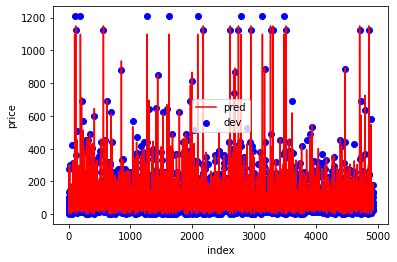

In [55]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(pred))], pred, color='r')
#plt.scatter([i for i in range(len(pred))],sorted(pred),color='r')
plt.scatter([i for i in range(len(pred))],y_test,color='b')
plt.ylabel('price')
plt.xlabel('index')
plt.legend(['pred', 'dev'], loc='best')
plt.show()

#dump(save) &load model with joblib

In [56]:
from sklearn.externals import joblib
joblib.dump(lm,'Genprice.joblib')

['Genprice.joblib']

In [0]:
lr=joblib.load('Genprice.joblib')

In [58]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
lr.intercept_

7.558824448884792

In [60]:
lr.coef_

array([-0.20197369,  1.27350373,  0.15684448,  0.0239253 , -0.1457017 ,
        0.07050556,  8.03444855, -4.92905774, -6.75134151,  2.67340165,
        1.0477452 ])

#Predict Test1

In [0]:
ts1=pd.read_csv('cleaningtestdata1.csv')
tx=ts1[['PrevAVGCost','PrevAssignedCost','AVGCost','LatestDateCost','A','B','C','D','E','F','G']]


In [0]:
prediction=lr.predict(tx)

In [0]:
ts1['GenPrice']=prediction

In [0]:
test1=ts1[['SKU','date','GenPrice']]

In [65]:
test1

,SKU,date,GenPrice
0,A-A-00001,2020-01-20,45.478556
1,A-B-00001,2020-01-20,77.374771
2,A-B-00002,2020-01-20,55.189403
3,A-C-00001,2020-01-20,109.367886
4,A-C-00019,2020-01-20,109.367886
...,...,...,...
495,A-E-00170,2020-01-20,7.558824
496,A-E-00171,2020-01-20,7.558824
497,A-D-00149,2020-01-20,7.558824
498,A-B-00040,2020-01-20,7.558824


In [0]:
test1.to_csv('testdata1_linear.csv')

#Predic test2

In [0]:
ts2=pd.read_csv('cleaningtestdata2.csv')
test2=ts2[['PrevAVGCost','PrevAssignedCost','AVGCost','LatestDateCost','A','B','C','D','E','F','G']]

In [0]:
predic=lr.predict(test2)

In [0]:
ts2['GenPrice']=predic

In [0]:
test_2=ts2[['SKU','date','GenPrice']]

In [73]:
test_2

,SKU,date,GenPrice
0,A-A-00001,2020-03-27,39.180713
1,A-B-00001,2020-03-27,63.799517
2,A-B-00002,2020-03-27,59.908666
3,A-C-00001,2020-03-27,116.896616
4,A-C-00019,2020-03-27,116.896616
...,...,...,...
506,A-B-00040,2020-03-27,7.558824
507,A-I-00090,2020-03-27,7.558824
508,A-E-00190,2020-03-27,7.558824
509,A-E-00011,2020-03-27,7.558824


In [0]:
test_2.to_csv('testdata2_linear.csv')